<a href="https://colab.research.google.com/github/abubakarsidiq14/Digital-Alarm-Clock/blob/main/Instance_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!pip install --upgrade pip setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00
  Using cached setuptools-69.1.0-py3-none-any.whl (819 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
!pip install pyyaml==5.4

In [2]:
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

torch:  2.1 ; cuda:  cu121


In [3]:
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

In [4]:
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [5]:
import detectron2

In [8]:
!ls

Coco  Instance-Segmentation-Models


In [10]:
%cd ..

/content/data


In [17]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode

def get_microcontroller_dicts(directory):
    dataset_dicts = []
    with open(os.path.join(directory, '_annotations.coco.json')) as f:
        data = json.load(f)

    categories = {category['id']: category['name'] for category in data['categories']}

    for image in data['images']:
        record = {}
        record["file_name"] = os.path.join(directory, image["file_name"])
        record["image_id"] = image["id"]
        record["height"] = image["height"]
        record["width"] = image["width"]

        objs = []
        for annotation in data['annotations']:
            if annotation['image_id'] == image['id']:
                bbox = annotation['bbox']
                poly = annotation['segmentation']
                category_id = annotation['category_id']

                obj = {
                    "bbox": bbox,
                    "bbox_mode": BoxMode.XYWH_ABS,  # Assuming bbox is in [x, y, w, h] format
                    "segmentation": poly,
                    "category_id": category_id,
                    "iscrowd": annotation.get('iscrowd', 0)
                }
                objs.append(obj)

        record["annotations"] = objs
        dataset_dicts.append(record)

    return dataset_dicts

In [19]:
from detectron2.data import DatasetCatalog, MetadataCatalog
for d in ["train", "test"]:
    DatasetCatalog.register("Casting1" + d, lambda d=d: get_microcontroller_dicts('Coco/' + d))
    MetadataCatalog.get("Casting1" + d).set(thing_classes=['crack', 'holes', 'missing_holes'])
microcontroller_metadata = MetadataCatalog.get("Casting1_train")

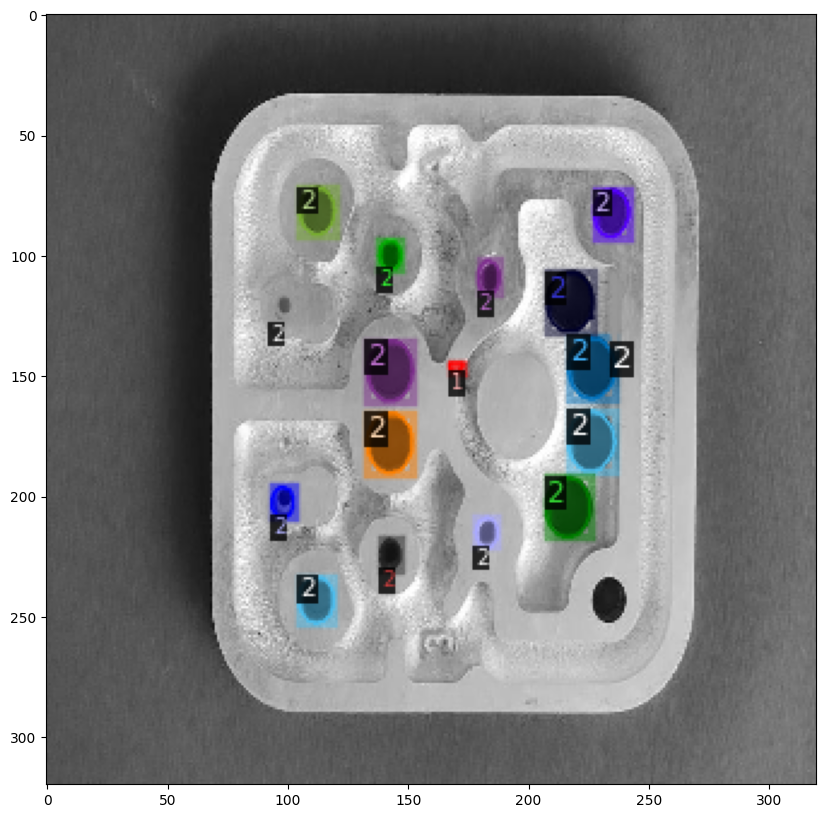

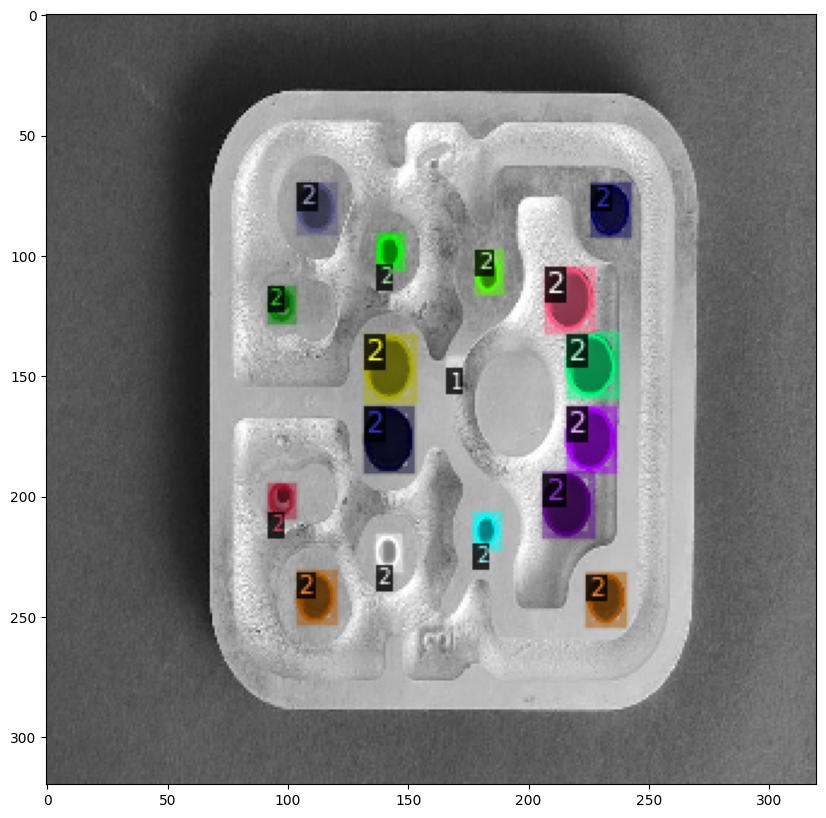

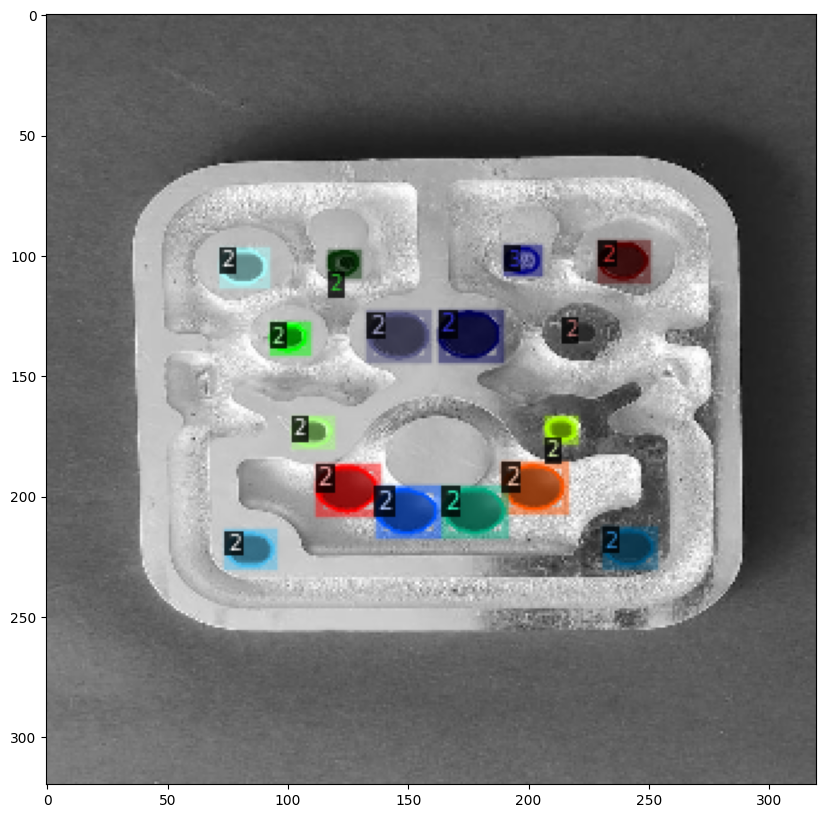

In [20]:
import random

dataset_dicts = get_microcontroller_dicts("Coco/train")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=microcontroller_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()